# Breast Cancer Detection Using Machine Learning Algorithms
                                                                                 By Narayan Jee Jha

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Define Dataset

In [2]:
path = "breast_cancer.csv"
df = pd.read_csv(path)
print(df.shape)

(569, 32)


In [3]:
df.head(3)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

We have 32 features in our dataset and feature = "id" is not of our use.
Our task is to predict the diagonis type which has two unique values, M (Malignant) and B (Benign).

In [5]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [6]:
# Seperation of dependent and independent features.
X = df.iloc[:,1:31].values
Y = df.iloc[:,31].values

In [7]:
# A statistical summary of our data set.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Check for missing or null values.
print(df.isnull().sum(), end = "\n\n\n")
print(df.isna().sum())

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64


id                         0
radius_mean                0

As we can see in the above output, there's no null or missing value in our dataset. Hurray!
Let's look into the relationships among all the features using correlation matrix and heatmap.

### Visualizaion of Dataset

<AxesSubplot:>

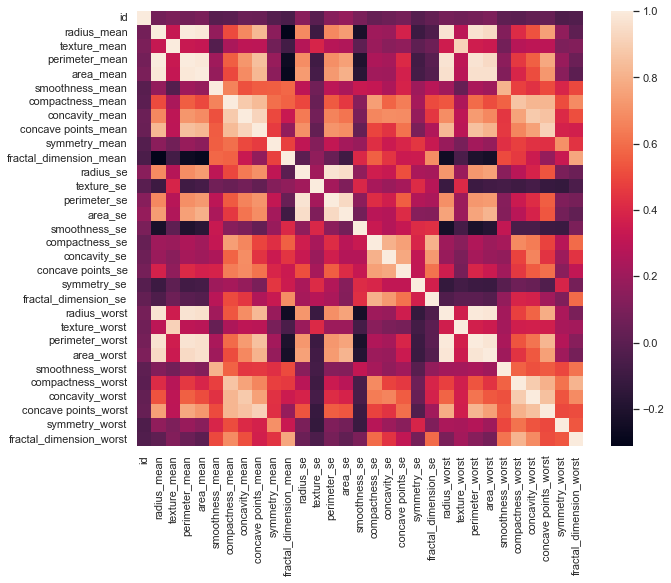

In [10]:
# Heatmap using the correlation matrtix.
correlation = df.corr(method = "pearson")
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(correlation)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

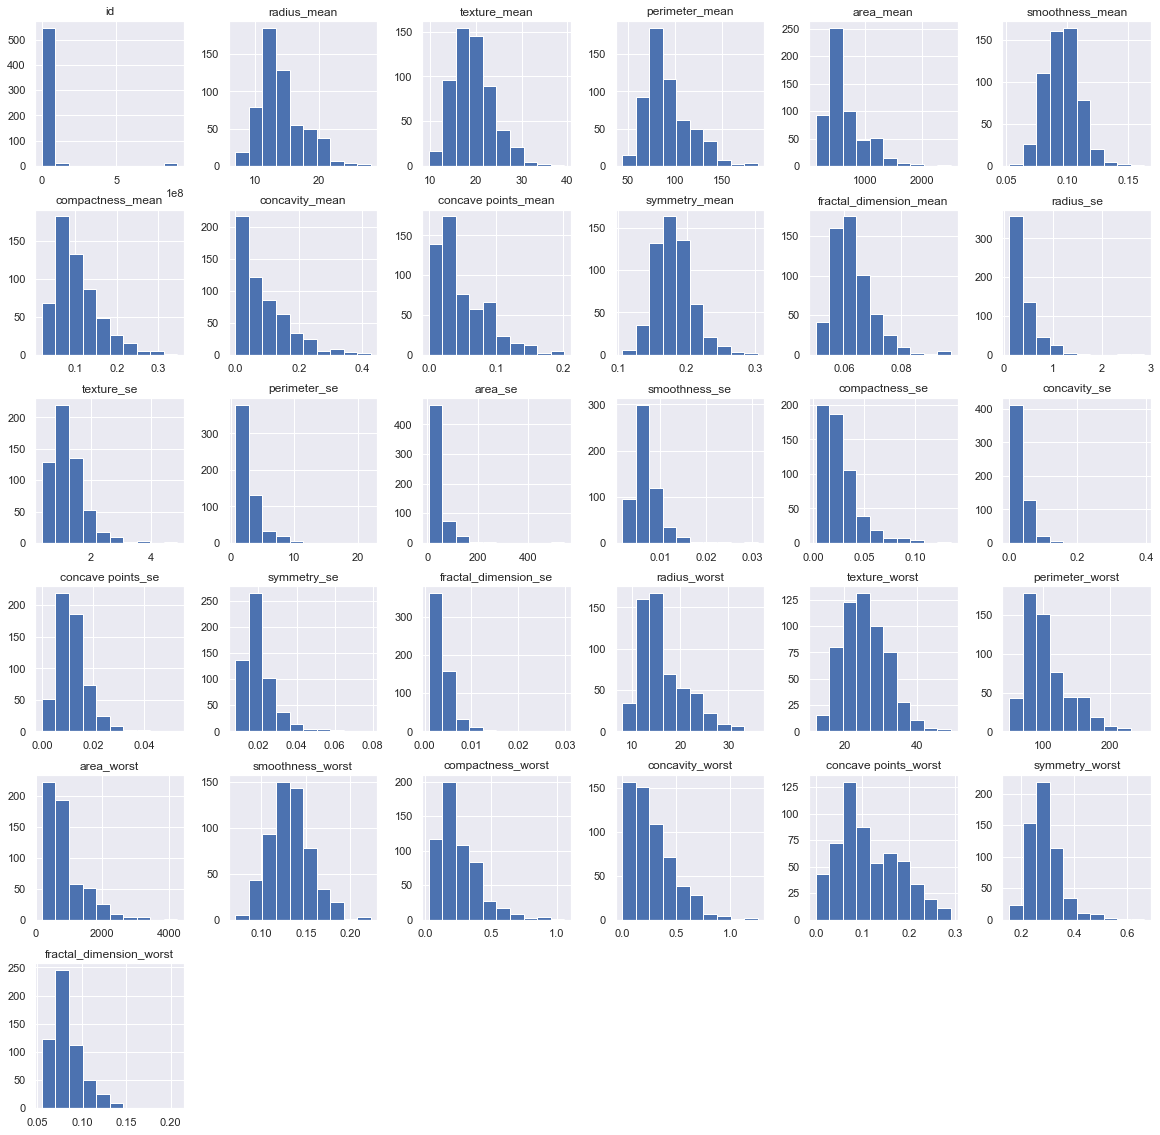

In [11]:
# Histogram plot of all the features.
df.hist(figsize = (20,20))

### Categorical Data Handling

The only one categorical variable in our dataset is the target variable, Y = "daignosis".

In [12]:
print("Categorical feature (diagnosis) before encoding: ")
print(Y)

Categorical feature (diagnosis) before encoding: 
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 

In [13]:
# Encoding of categorical feature.
from sklearn.preprocessing import LabelEncoder
encoder_Y = LabelEncoder()
Y = encoder_Y.fit_transform(Y)

In [14]:
print("Categorical feature (diagnosis) after encoding: ")
print(Y)

Categorical feature (diagnosis) after encoding: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 

### Splitting of Dataset

In [15]:
# Splitting dataset into training and testing parts.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [16]:
# Using standard scaler for feature scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Import Metrics

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Machine Learning Models

In [18]:
# 1. Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred), end = "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), end = "\n")
print("F1 Score = ", f1_score(Y_test, Y_pred))

Confusion Matrix: 
[[70  1]
 [ 2 41]]
Accuracy Score =  0.9736842105263158
F1 Score =  0.9647058823529412


In [19]:
# 2. Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred), end = "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), end = "\n")
print("F1 Score = ", f1_score(Y_test, Y_pred))

Confusion Matrix: 
[[68  3]
 [ 3 40]]
Accuracy Score =  0.9473684210526315
F1 Score =  0.9302325581395349


In [20]:
# 3. Support Vector Machines Classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred), end = "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), end = "\n")
print("F1 Score = ", f1_score(Y_test, Y_pred))

Confusion Matrix: 
[[68  3]
 [ 2 41]]
Accuracy Score =  0.956140350877193
F1 Score =  0.942528735632184


In [21]:
# 4. Kernel SVM Classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred), end = "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), end = "\n")
print("F1 Score = ", f1_score(Y_test, Y_pred))

Confusion Matrix: 
[[71  0]
 [ 2 41]]
Accuracy Score =  0.9824561403508771
F1 Score =  0.9761904761904763


In [22]:
# 5. Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred), end = "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), end = "\n")
print("F1 Score = ", f1_score(Y_test, Y_pred))

Confusion Matrix: 
[[70  1]
 [ 3 40]]
Accuracy Score =  0.9649122807017544
F1 Score =  0.9523809523809524


In [23]:
# 6. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred), end = "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), end = "\n")
print("F1 Score = ", f1_score(Y_test, Y_pred))

Confusion Matrix: 
[[70  1]
 [ 4 39]]
Accuracy Score =  0.956140350877193
F1 Score =  0.9397590361445783


In [24]:
# 7. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred), end = "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), end = "\n")
print("F1 Score = ", f1_score(Y_test, Y_pred))

Confusion Matrix: 
[[71  0]
 [ 3 40]]
Accuracy Score =  0.9736842105263158
F1 Score =  0.963855421686747


### Final Result

Accuracy Score:
1. Logistic Regression — 97.36%
2. Nearest Neighbor — 94.73%
3. Support Vector Machines — 95.61%
4. Kernel SVM — 98.24%
5. Naive Bayes — 96.49%
6. Decision Tree Algorithm — 95.61%
7. Random Forest Classification — 97.36%

F1 Score:
1. Logistic Regression — 96.47%
2. Nearest Neighbor — 93.02%
3. Support Vector Machines — 94.25%
4. Kernel SVM — 97.61%
5. Naive Bayes — 95.23%
6. Decision Tree Algorithm — 93.97%
7. Random Forest Classification — 96.38%